# Travail personnel 1 : Kepler et RK4
#### Cordier Alix & Vandepopeliere Romain - BA3 PHYS

## Mise en situation
Les première étapes consisteront à importer les librairies requises et ensuite d'implémenter les valeurs des constantes et des conditions initiales. Pour ces dernières nous avons choisi de placer le centre de la terre en $(0,0)$ du plan $xy$, d'imaginer le périhélie vers les $x$ négatifs et de choisir la vitesse initiale dirigée vers les $y$ positifs comme sur le schéma de l'énoncé.

<img src="figs/ellipse.png" alt="Drawing" style="width: 400px;"/>

In [1]:
from math import sin, cos, log, ceil
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
## constantes
G=6.67408*10**(-11)  # m^3.kg^-1.s^-2
mT=5.972*10**24      # kg    (masse de la Terre)
mL=7.348*10**22      # kg    (masse de la Lune)

## données
rmin=362600000.0     # m
Vpér=1083.434974     # m.s^-1

## conditions initiales
x0=-rmin             # m
y0=0.0               # m
vx0=0.0              # m.s^-1
vy0=Vpér             # m.s^-1

Comme dit précédemment, on a placé la Terre à l'origine du repère. Cependant, la Terre n'étant pas un référentiel inertiel, on va se placer dans le référentiel du centre de masse (qui lui est inertiel) pour obtenir les équations du mouvement:

$$m_L\frac{d^2\vec{r_L}}{dt^2}=-\frac{Gm_Tm_L}{r^3}\vec{r}$$
$$m_T\frac{d^2\vec{r_T}}{dt^2}=\frac{Gm_Tm_L}{r^3}\vec{r}$$

où $\vec{r_L}$ et $\vec{r_T}$ sont les positions de la Lune et de la Terre dans le réferentiel du centre de masse respectivement, et où $\vec{r}=\vec{r_L}-\vec{r_T}$ est le vecteur joignant la Terre à la Lune, de norme $r$.

Pour obtenir une équation pour $\vec{r}$ uniquement, on divise chacune des 2 équations ci-dessus par la masse du membre de gauche et on les soustrait:

$$\frac{d^2\vec{r_L}}{dt^2}-\frac{d^2\vec{r_T}}{dt^2}=-\frac{Gm_T}{r^3}\vec{r}-\frac{Gm_L}{r^3}\vec{r}$$

et la différence des dérivées secondes de $\vec{r_L}$ et $\vec{r_T}$ étant la dérivée seconde de $\vec{r}$, on a :

$$\frac{d^2\vec{r}}{dt^2}=-\frac{Gm_T}{r^3}\vec{r}-\frac{Gm_L}{r^3}\vec{r}=-\frac{G(m_T+m_L)}{r^3}~~\vec{r}$$

Avec $\vec{r}=(x,y)$, on obtient alors le système d'équations:

$$ \frac{d^2x}{dt^2} = - \frac{G(m_T+m_L)}{(x^2+y^2)^{3/2}}~~x  $$
$$ \frac{d^2y}{dt^2} = - \frac{G(m_T+m_L)}{(x^2+y^2)^{3/2}}~~y  $$

Afin d'avoir des équations du premier ordre, il est judicieux d'introduire les vitesses: 

$$\frac{dx}{dt} = v_x $$
$$\frac{dy}{dt} = v_y $$

$$ \frac{dv_x}{dt} = - \frac{G(m_T+m_L)}{(x^2+y^2)^{3/2}}~~x  $$

$$ \frac{dv_y}{dt} = - \frac{G(m_T+m_L)}{(x^2+y^2)^{3/2}}~~y  $$


On crée alors un vecteur $\vec{u}(t)$ tel que $$\vec{u}(t) = \begin{pmatrix} x\\y\\v_x\\v_y \end{pmatrix} $$

En vue du système des 4 équations précédentes, le vecteur dérivé $\vec{u}'(t)$ sera comme suit :

$$\vec{u}'(t) = \begin{pmatrix} v_x\\v_y\\- \frac{G(m_T+m_L)}{(x^2+y^2)^{3/2}} x   \\ - \frac{G(m_T+m_L)}{(x^2+y^2)^{3/2}} y\end{pmatrix} $$

## Question 1

Avant de commencer, on implémente la méthode Runge-Kutta 4. 

In [3]:
def rk4_step(u,f,dt):
    
    k1=f(u)
    k2=f(u+dt*k1/2)
    k3=f(u+dt*k2/2)
    k4=f(u+dt*k3)
    
    return u+(k1+2*k2+2*k3+k4)*dt/6

Ensuite, on peut également implémenter la fonction $$f(\vec{u})=\vec{u}'$$

In [4]:
def f(u):
    
    x=u[0]
    y=u[1]
    vx=u[2]
    vy=u[3]
    r=(x**2+y**2)**(3/2)
    c=-G*(mT+mL)/r
    
    return numpy.array([vx,vy,c*x,c*y])

Sachant que la période de révolution de la Lune est un peu inférieure à 30 jours, on choisit de chercher la trajectoire pour une durée de 30 jours pour être sûrs qu'il y a aura au moins une révolution entière.

In [5]:
T=86400*30              # 30 jours
dt=1                    # seconde
N=int(T/dt)+1           # nombre de time steps

u=numpy.empty((N,4))                # on prépare le tableau de solutions
u[0]=numpy.array([x0,y0,vx0,vy0])   # conditions initiales

for t in range(N-1):                # exécution de la méthode RK4              
    u[t+1]=rk4_step(u[t],f,dt)

Portons en graphique la trajectoire obtenue:

In [6]:
x_traj=u[:,0]
y_traj=u[:,1]

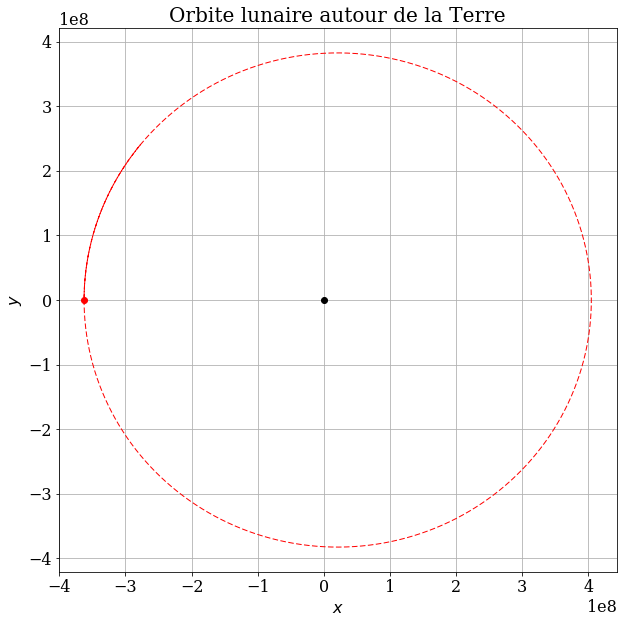

In [7]:
pyplot.figure(figsize=(10,10))
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.title('Orbite lunaire autour de la Terre',fontsize=20)
pyplot.plot (x_traj,y_traj,'r--',lw=1)
pyplot.plot (0,0,'ko')
pyplot.plot (x0,0,'ro')

Le point noir représente la position de la Terre et le point rouge celle dans la lune en $t=0$.

##### Remarques
1) Comme le T choisi est supérieur à la période, il est normal de voir une superposition de trajectoires après une révolution entière.

2) Le calcul d'excentricité de l'ellipse obtenue et la comparaison avec la trajectoire théorique seront effectués après la question 2.

## Question 2

Nous allons maintenant chercher les valeurs du demi-grand axe et du demi-petit axe.
Pour ce faire, on va calculer la distance qui sépare $x_{min}$ de $x_{max}$ (=grand axe) et ensuite celle qui sépare $y_{min}$ de $y_{max}$ (=petit axe).

Comme l'ellipse est centrée verticalement, commençons par chercher les endroits de la trajectoire qui coupent l'axe $x$ pour trouver  $x_{min}$ et $x_{max}$. Pour cela, on va affiner un intervalle de distance autour de $y=0$ avec la fonction numpy.where jusqu'à ce qu'on n'ait plus que 3 indices, correspondant (approximativement) aux 3 intersections avec l'axe x que l'on voit sur le graphique (on estime qu'un intervalle de l'ordre de la centaine de mètres est correct par rapport à la longueur des axes de l'ellipse qui seront de l'ordre de la centaine de milliers de kilomètres). Prenons donc les indices relatifs aux 2 premières intersections (la 3ème correspondant à la Lune qui repasse par le point initial pour recommencer un tour).

In [8]:
idx_extr=numpy.where(abs(y_traj)<=450.0)[0]
print(idx_extr)

[      0 1175341 2350682]


In [9]:
xmin=x_traj[idx_extr[0]]  # on cherche les x correspondant aux indices trouvés
xmax=x_traj[idx_extr[1]]
print(xmin)
print(xmax)

-362600000.0
404726232.866


On peut maintenant calculer le demi-grand axe a:

In [10]:
a=abs(xmin-xmax)/2
print(a)

383663116.433


Pour le demi-petit axe, c'est plus compliqué car l'ellipse n'est pas centrée horizontalement. On va donc calculer les coordonnées du centre de l'ellipse (on peut le faire maintenant qu'on connait $x_{min}$ et $x_{max}$) pour ensuite décaler toute l'ellipse afin de ramener son centre en $(0,0)$ et ainsi pouvoir étudier le petit axe au moyen des intersections avec l'axe y. Cette fois, en vue du graphique, on s'attend à trouver les indices de 2 intersections : $y_{min}$ et $y_{max}$.

In [11]:
xcentre=(xmax+xmin)/2
print(xcentre)

21063116.433


In [12]:
x_traj_centree=x_traj-xcentre   # on décale l'ellipse

On affine un intervalle de distance autour de x=0:

In [13]:
idy_extr=numpy.where(abs(x_traj_centree)<=505)[0]
print(idy_extr)

[ 567131 1783551]


In [14]:
ymax=y_traj[idy_extr[0]]  # on cherche les y correspondant aux indices trouvés
ymin=y_traj[idy_extr[1]]

Et on calcule le demi-petit axe b:

In [15]:
b=abs(ymin-ymax)/2
print(b)

383084497.255


Ainsi, on obtient finalement les résultats pour $a$ le demi-grand axe et $b$ le demi-petit axe : 
$$a = 3,83663116.10^8m$$
$$b = 3,83084497.10^8m$$

Une autre manière de procéder pour obtenir les valeurs des demi-axes aurait par exemple été de créer des listes contenant les indices relatifs aux points de la trajectoire présents sur 1/4 de l'ellipse. Par exemple, pour trouver $y_{max}$, on aurait pu utiliser un numpy.where pour trouver les indices des points de y positif et un autre pour trouver ceux de vy positif. En utilisant numpy.intersect1d pour les 2 tableaux obtenus, on aurait alors obtenu l'ensemble des indices relatifs aux points du quadrant supérieur gauche de l'ellipse, et le dernier élément du tableau aurait été l'indice relatif à $y_{max}$. On a obtenu les mêmes résultats pour a et b avec cette méthode, mais on ne peut pas toujours l'appliquer quand on a des superpositions de trajectoires dues à un choix de temps supérieur à la période par exemple.

#### Valeurs théoriques des demi-axes

On sait que l'ellipse théorique a pour équation:

$$r(\theta)=\frac{r_{min}(1+\epsilon)}{1+\epsilon \cos\theta}.$$ 
avec l'excentricité $$\epsilon = 0.0549006$$

On peut donc en déduire les valeurs théoriques de $x_{min}$ et $x_{max}$ :

In [16]:
e=0.0549006

def X_theo(theta):                     # prend un angle et renvoie l'abscisse du point de l'ellipse correspondant
    r_theo=rmin*(1+e)/(1+e*cos(theta))
    return r_theo*cos(theta)

def Y_theo(theta):                     # idem avec l'ordonnée
    r_theo=rmin*(1+e)/(1+e*cos(theta))
    return r_theo*sin(theta)

xmin_theo=X_theo(numpy.pi)                   # calcul des 2 points théoriques
xmax_theo=X_theo(0)

a_theo=abs(xmin_theo-xmax_theo)/2      # calcul du demi-grand axe théorique

print('Demi-grand axe théorique: a_theo = {:.3f}'.format(a_theo))

Demi-grand axe théorique: a_theo = 383663348.003


La formule de l'excentricité $e$ est donnée par:

$$e=\frac{\sqrt{a^2-b^2}}{a}$$

Vu qu'on connaît maintenant l'excentricité théorique et le demi-grand axe théorique, on peut alors facilement déterminer le demi petit axe théorique:

$$b=a\sqrt{1-e^2}$$

In [17]:
b_theo=a_theo*(1-e**2)**(1/2)
print('Demi-petit axe théorique: b_theo = {:.3f}'.format(b_theo))

Demi-petit axe théorique: b_theo = 383084716.443


#### Calcul de l'excentricité de l'ellipse obtenue numériquement

On a vu juste au-dessus la formule qui relie l'excentricité aux demi-axes. En reprenant les valeurs des demi-axes de l'ellipse obtenue avec RK4, calculés précédemment, on trouve:

In [18]:
e_num=(a**2-b**2)**(1/2)/a
print(e_num)

0.0549000295618


On obtient donc une excentricité valant $$e=0.05490003$$

#### Tracé théorique de l'ellipse et comparaison avec celle obtenue avec RK4

On peut obtenir le tracé de l'ellipse à partir de l'équation paramétrique vue précédement.

In [19]:
n=10000             #nombre choisi arbitrairement
theta=numpy.linspace(0.0,2*numpy.pi,n)
x_theo=numpy.empty(n)
y_theo=numpy.empty(n)

In [20]:
for i in range(n):
    x_theo[i]=X_theo(theta[i])
    y_theo[i]=Y_theo(theta[i])

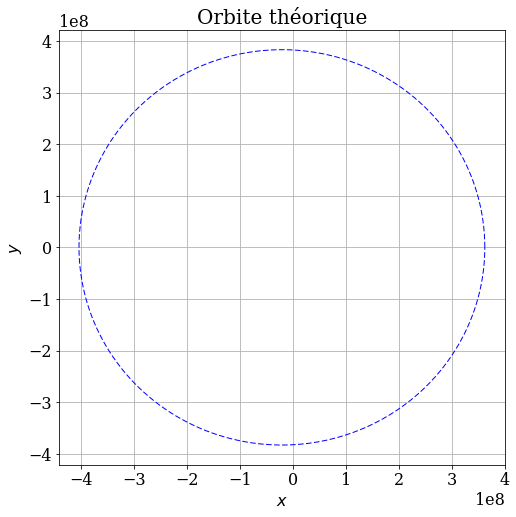

In [21]:
pyplot.figure(figsize=(8,8))
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.title('Orbite théorique',fontsize=20)
pyplot.plot (x_theo,y_theo, 'b--',lw=1)

Pour qu'une comparaison sur le même graphique ait un sens, il faut recentrer les deux ellipses. Le travail a déjà été réalisé pour l'ellipse "expérimentale"; il faut donc appliquer le même procédé pour la théorique (on remarque que, de nouveau, l'ellipse est déjà centrée verticalement).

In [22]:
idx_extr_th=numpy.where(abs(y_theo)<=210000.0)[0]     # l'intervalle est plus grand qu'avant car il y a beaucoup moins 
print(idx_extr_th)                                   # de points qui constituent la trajectoire

[   0 4999 5000 9999]


In [23]:
xmin_th=x_theo[idx_extr_th[0]]     # on cherche les x correspondant aux indices trouvés
xmax_th=x_theo[idx_extr_th[1]]

In [24]:
centre_th=(xmax_th+xmin_th)/2      # centre de l'ellipse théorique
print(centre_th)

-21063337.435


In [25]:
x_theo_centree=x_theo-centre_th    # ellipse théorique décalée

On peut maintenant comparer graphiquement les 2 ellipses:

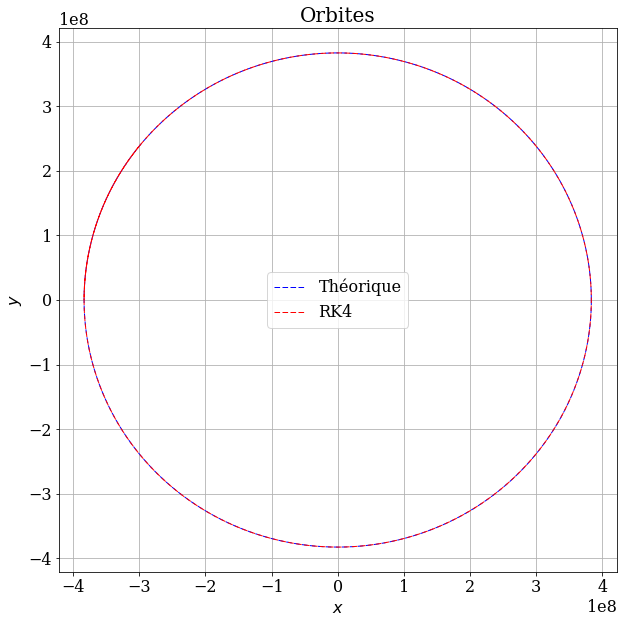

In [26]:
pyplot.figure(figsize=(10,10))
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.title('Orbites',fontsize=20)
pyplot.plot (x_theo_centree,y_theo, 'b--',lw=1,label='Théorique')
pyplot.plot (x_traj_centree,y_traj, 'r--',lw=1,label='RK4')
pyplot.legend()

En plus de la comparaison des excentricités "expérimentales" et théoriques, on peut maintenant comparer graphiquement les ellipses. Celles-ci semblent bien coïncider.

## Question 3 

La réponse à cette question est directement donnée par ce qu'on a fait au début de la question 2. En effet, on a trouvé les indices des 3 intersections de la trajectoire avec l'axe $x$ et il suffit donc de comparer l'indice de la 1ère intersection avec celui de la 3ème. Vu les conditions initiales, il est logique que l'indice de la première intersection soit 0 et que la période soit donc donnée par l'indice de la 3ème intersection (le pas $dt$ valant 1 seconde, l'indice est donc directement le nombre de secondes écoulées depuis l'instant 0).

In [27]:
periode=idx_extr[2]
print(periode)
periode_en_jours=periode/84600
print(periode_en_jours)

2350682
27.7858392435


On obtient donc une période $ T=27,78583924 j.$

*Remarque*: en utilisant la même méthode que celle évoquée avant (avec les quadrants), si on prend le dernier élément du tableau d'indices relatifs aux points de y négatif et de vy positif, on trouve également la même valeur pour la période.

#### Période théorique

La formule théorique de la période pour ce genre de problème est donnée par (cf. Syllabus de Pierre Gaspard, MATH F204-Mécanique Analytique, 5.4 "Le problème de Kepler") : $$T=\frac{2\pi a^{3/2}}{\sqrt{G(m_T+m_L)}}$$


In [28]:
periode_theo=2*numpy.pi*a_theo**(3/2)/(G*(mT+mL))**(1/2)
print(periode_theo)
periode_theo_en_jours=periode_theo/86400
print(periode_theo_en_jours)

2350683.9301896757
27.206989932750876


En prenant notre valeur théorique du demi-grand axe $a$, on obtient comme période théorique $T_{th}=27,20699j$, ce qui se rapproche de ce que l'on a obtenu. 

## Question 4

Nous allons maintenant tenter de vérifier si la méthode RK4 utilisée se comporte bien de la façon attendue, c'est-à-dire si on observe bien un ordre de convergence proche de 4 pour cette méthode.
Dans un premier temps, nous allons vérifier cela de façon graphique.

On commence par chercher plusieurs trajectoires avec différents pas de temps:

In [29]:
dt_values = numpy.array([10000, 5000, 2000, 1000, 500])

s_values = numpy.empty_like(dt_values, dtype=numpy.ndarray) # on prépare le tableau des solutions

for i, dT in enumerate(dt_values):
    
    N = int(periode/dT)+1                # nombre de time steps              
    t = numpy.linspace(0.0, periode, N)  # time grid
    
    s = numpy.empty((N, 4))              # on prépare le tableau des solutions pour un dT particulier
    s[0] = numpy.array([x0,y0,vx0,vy0])  # conditions initiales

    for n in range(N-1):                 # RK4
        s[n+1] = rk4_step(s[n], f, dT)
    
    s_values[i] = s

On définit la fonction get_diffgrid qui va servir à obtenir la différence entre 2 solutions numériques et qui en prendra ensuite la norme $L_1$ de cette différence (de tableaux).

In [30]:
def get_diffgrid(u_current, u_fine, dT):
    
    N_current = len(u_current[:,0])
    N_fine = len(u_fine[:,0])
   
    grid_size_ratio = ceil(N_fine/N_current)
    
    diffgrid = dT * numpy.sum( numpy.abs(\
            u_current[:,0]- u_fine[::grid_size_ratio,0])) 
    
    return diffgrid

On cherche alors la norme $L_1$de la différence entre chaque solution numérique et celle qui possède le plus petit pas (ici, 500 secondes).

In [31]:
diffgrid = numpy.empty_like(dt_values)      # tableau qui contiendra les normes

for i, dT in enumerate(dt_values):

    diffgrid[i] = get_diffgrid(s_values[i], s_values[-1], dT)

print(diffgrid)

[29030004  1736484    43097     2514        0]


On porte ces valeurs (sauf la dernière) en graphique en fonction du pas de temps:

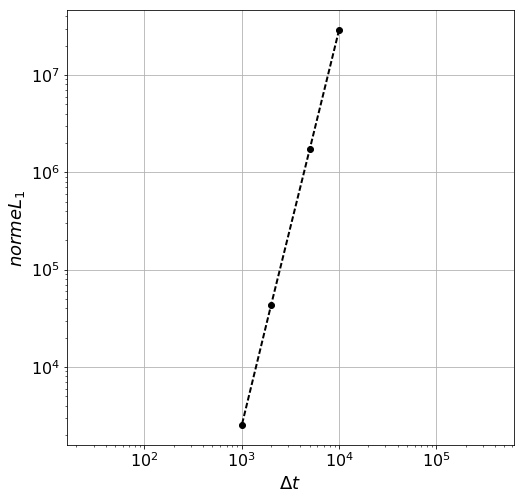

In [32]:
pyplot.figure(figsize=(8,8))
pyplot.grid(True)
pyplot.xlabel(r'$\Delta t$', fontsize=18)
pyplot.ylabel(r'$norme L_1$', fontsize=18)
pyplot.axis('equal')
pyplot.loglog(dt_values[:-1], diffgrid[:-1], color='k', ls='--', lw=2, marker='o');

Globalement, on semble obtenir un bon résultat: les normes des différences entre chaque solution et celle de plus petit pas diminuent rapidement avec le pas de temps. De plus, on peut observer graphiquement que la pente de la droite obtenue est environ 4.

Pour étudier plus précisément la convergence de notre méthode, on peut calculer l'ordre de convergence p observé. Pour ce faire, on utilise 3 solutions numériques dont les pas diffèrent à un rapport r constant et on utilise la formule:

$$ p=\frac{\log{\frac{f_3-f_2}{f_2-f_1}}}{\log{r}} $$

( $f_1$ et $f_3$ correspondant à la solution de plus petit pas et de plus grand pas respectivement)

In [33]:
r = 2               # ratio
h = 3600            # pas

dt_values = numpy.array([h, r*h, r**2*h])

s_values = numpy.empty_like(dt_values, dtype=numpy.ndarray) # tableau solutions

diffgrid = numpy.empty(2) 

for i, dT in enumerate(dt_values):
    
    N = int(periode/dT) + 1 

    s = numpy.empty((N, 4))
    s[0] = numpy.array([x0,y0,vx0,vy0])

    for n in range(N-1):

        s[n+1] = rk4_step(s[n], f, dT)
    
    s_values[i] = s
    

### f2 - f1
diffgrid[0] = get_diffgrid(s_values[1], s_values[0], dt_values[1])

### f3 - f2
diffgrid[1] = get_diffgrid(s_values[2], s_values[1], dt_values[2])

### ordre de cvgce
p = (log(diffgrid[1])-log(diffgrid[0])) / log(r)

print('Ordre de convergence: p = {:.3f}'.format(p));

Ordre de convergence: p = 4.091


*Remarque:* on a choisi des valeurs de h beaucoup plus élevées qu'une seconde parce que les valeurs de pas très petites par rapport à l'échelle de temps du problème (1, 2 et 4 secondes par exemple) ne sont pas adaptées pour un calcul d'ordre de convergence. En effet, des différences de solutions pour des pas si peu élevés seraient équivalentes à des erreurs d'arrondi lors des calculs.

## Question 5

Dans ce problème, l'astéroïde sera soumis à 2 forces: la force gravitationnelle exercée par la Terre et la force gravitationnelle exercée par la Lune.
Pour obtenir les équations du mouvement pour cette situation, on va procéder de la même manière que dans la question 1 et se placer dans le référentiel du centre de masse. On se ramènera ensuite à une équation sur la position de l'astéroïde par rapport à la Terre $\vec{a}$.
Dans le référentiel du centre de masse, on a :


$$ m_a\frac{d^2\vec{r_a}}{dt^2}= -\frac{Gm_am_T}{a^3}\vec{a}-\frac{Gm_am_L}{|\vec{a}-\vec{r}|^3}~~(\vec{a}-\vec{r}) $$

$$m_T\frac{d^2\vec{r_T}}{dt^2}=\frac{Gm_Tm_L}{r^3}\vec{r}$$

où $\vec{r_a}$ et $\vec{r_T}$ sont les positions de l'astéroïde et de la Terre dans le réferentiel du centre de masse respectivement, où $\vec{r}=\vec{r_L}-\vec{r_T}$ est le vecteur joignant la Terre à la Lune, de norme $r$, et où $\vec{a}=\vec{r_a}-\vec{r_T}$ est le vecteur joignant la Terre à l'astéroïde, de norme $a$.

A nouveau, on divise ces équations par les masses et on les soustrait:

$$ \frac{d^2\vec{r_a}}{dt^2}-\frac{d^2\vec{r_T}}{dt^2}=-\frac{Gm_T}{a^3}\vec{a}-\frac{Gm_L}{|\vec{a}-\vec{r}|^3}~~(\vec{a}-\vec{r})-\frac{Gm_L}{r^3}\vec{r} $$

$$ \frac{d^2\vec{a}}{dt^2}=-\frac{Gm_T}{a^3}\vec{a}-\frac{Gm_L}{|\vec{a}-\vec{r}|^3}~~(\vec{a}-\vec{r})-\frac{Gm_L}{r^3}\vec{r} $$


On voit que l'accélération de l'astéroïde par rapport à la Terre dépendra de la distance entre l'astéroïde et la Terre (fixe par le choix du référentiel) et de la distance entre l'astéroïde et la Lune (elle-même en mouvement par rapport à la Terre).

On note $\vec{a}=(x_a,y_a)$ et $\vec{r}=(x_L,y_L)$.
On obtient alors le système d'équations suivant:

$$ \frac{d^2x_a}{dt^2}= -G \frac{m_T}{(x_a^2+y_a^2)^{3/2}} ~~x_a -G \frac{m_L}{((x_a-x_L)^2+(y_a-y_L)^2)^{3/2}} ~~~~~~(x_a-x_L)-G \frac{m_L}{(x_L^2+y_L^2)^{3/2}}~~x_L $$

$$ \frac{d^2y_a}{dt^2}= -G \frac{m_T}{(x_a^2+y_a^2)^{3/2}} ~~y_a -G \frac{m_L}{((x_a-x_L)^2+(y_a-y_L)^2)^{3/2}} ~~~~~~(y_a-y_L)-G \frac{m_L}{(x_L^2+y_L^2)^{3/2}}~~y_L$$

On peut à nouveau faire intervenir les vitesses pour obtenir 4 équations du 1er ordre.

On définit alors le vecteur $\vec{w}(t)$ tel que
$$\vec{w}(t) = \begin{pmatrix} x_a\\y_a\\v_{x,a}\\v_{y,a}\end{pmatrix}$$

et celui-ci obéit à l'équation: 

$$\vec{w}'(t) = \begin{pmatrix} v_{x,a}\\v_{y,a}\\-G \frac{m_T}{(x_a^2+y_a^2)^{3/2}} x_a -G \frac{m_L}{((x_a-x_L)^2+(y_a-y_L)^2)^{3/2}} (x_a-x_L)-G \frac{m_L}{(x_L^2+y_L^2)^{3/2}}x_L~~~~~ \\ -G \frac{m_T}{(x_a^2+y_a^2)^{3/2}} y_a -G \frac{m_L}{((x_a-x_L)^2+(y_a-y_L)^2)^{3/2}} (y_a-y_L)-G \frac{m_L}{(x_L^2+y_L^2)^{3/2}}y_L~~~~~ \end{pmatrix} $$

On pose à nouveau une fonction:

$$g(\vec{w})=\vec{w}' $$

La fonction $g$ va dépendre du temps car, bien que la Terre reste en $(0,0)$, la Lune bouge et donc ses coordonnées $(x_L,y_L)$ (reprises dans x_traj et y_traj) vont évoluer au cours du temps.

*Remarque:* bien entendu, on suppose que l'astéroïde n'influence pas le système Terre-Lune et donc que la trajectoire de la Lune précédemment calculée est toujours valable.

In [34]:
def g(u,t):
    
    xa=u[0]
    ya=u[1]
    vxa=u[2]
    vya=u[3]
    
    i=int(t)                     # RK4 donnera des temps non entiers en input, ce qui pose problème car i doit être un indice
    distT_a3=(xa**2+ya**2)**(3/2)                 
    distL_a3=((xa-x_traj[i])**2+(ya-y_traj[i])**2)**(3/2)
    distT_L3=(x_traj[i]**2+y_traj[i]**2)**(3/2)
    
    return numpy.array([vxa , vya , -G*mT*xa/distT_a3 - G*mL*(xa-x_traj[i])/distL_a3 -G*mL*x_traj[i]/distT_L3 , -G*mT*ya/distT_a3 - G*mL*(ya-y_traj[i])/distL_a3 - G*mL*y_traj[i]/distT_L3 ])

##### Remarque 
On suppose que prendre $i=int(t)$ ne change pas fondamentalement le problème.

Grâce aux calculs des intersections de la trajectoire de la lune avec l'axe $x$, on sait qu'elle est à l'apogée en  $$t_0=1175341 s  $$
Introduisons $t'=t-t_0$ qui sera le temps écoulé depuis que la lune a passé son apogée (sachant que t est le temps écoulé depuis qu'elle a commencé sa révolution).

De plus, on a aussi calculé le centre de l'ellipse: $(21063116.433,0)$

Commençons par regarder la trajectoire sur une période de 2 jours.

In [35]:
###Paramètres
dt_a = 1
T_a = 2*86400           # étude de la trajectoire sur 2 jours
N_a=int(T_a / dt_a) +1

###Conditions initiales
xa0 = 21063116.433       # centre de l'ellipse
ya0 = 0.0                # centre de l'ellipse
vxa0 = -500.0
vya0 = 500.0
t0= 1175341

Il faut redéfinir la méthode RK4 pour une fonction dépendant du temps:

In [36]:
def rk4_step_t(u,f,t,dt):
    
    k1=f(u,t)
    k2=f(u+dt*k1/2,t+dt/2)
    k3=f(u+dt*k2/2,t+dt/2)
    k4=f(u+dt*k3,t+dt)
    
    return u+(k1+2*k2+2*k3+k4)*dt/6

In [37]:
w=numpy.empty((N_a,4))                 # tableau de solutions
w[0]=numpy.array([xa0,ya0,vxa0,vya0])  # conditions initiales

Lorsque l'astéroïde "apparaît", on est en $t'=0$.  Dans RK4, ll ne faut donc pas oublier de shifter le temps de + $t_0$ pour qu'en $t'=0$, on ait bien la force exercée par la lune sur l'astéroïde au moment où celle-ci est à l'apogée.

In [38]:
for i in range(N_a-1):              
    w[i+1]=rk4_step_t(w[i],g,i+t0,dt_a)      

On porte en graphique la trajectoire de l'astéroïde:

In [39]:
x_traj_a=w[:,0]
y_traj_a=w[:,1]

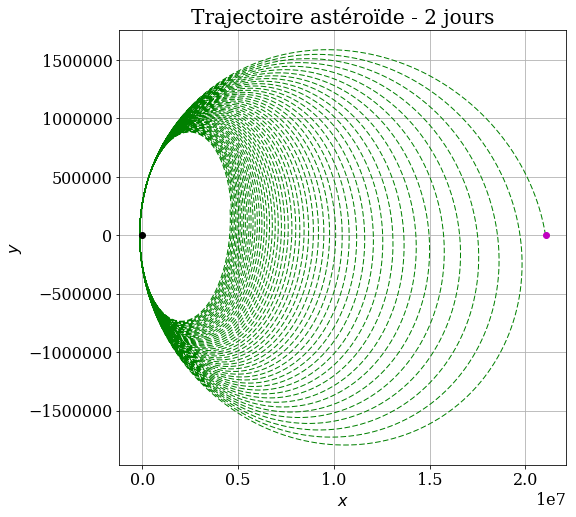

In [41]:
pyplot.figure(figsize=(8,8))
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.title('Trajectoire astéroïde - 2 jours',fontsize=20)
pyplot.plot (x_traj_a,y_traj_a, 'g--',lw=1)
pyplot.plot (xa0,ya0,'mo')
pyplot.plot (0,0,'ko')

Le point noir représente la position de la Terre, le rose la position de l'astéroïde en $t'=0$.

Etant donné la position initiale de l'astéroïde qui est très proche du centre de la terre, celui-ci est directement "happé" par la gravitation terrestre alors que la lune, beaucoup moins massive que la terre et étant très loin de là, n'a pas beaucoup d'influence sur la trajectoire de l'astéroïde.

On remarque en fait que l'astéroïde ne devrait même pas effectuer une seule orbite puisqu'il devrait s'écraser sur la Terre. Nous allons faire apparaitre le contour de la Terre pour s'en rendre compte (en supposant que la terre est sphérique).

In [42]:
rayon=6400000      # rayon de la Terre
n=1000
x_terre=numpy.empty(n)
y_terre=numpy.empty(n)
theta=numpy.linspace(0,2*numpy.pi,n)
for i in range(n):
    x_terre[i]=rayon*cos(theta[i])
    y_terre[i]=rayon*sin(theta[i])

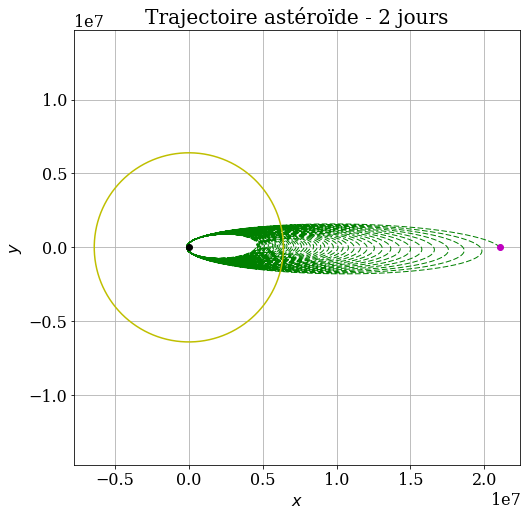

In [44]:
pyplot.figure(figsize=(8,8))
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.title('Trajectoire astéroïde - 2 jours',fontsize=20)
pyplot.axes().set_aspect('equal','datalim')
pyplot.plot (x_traj_a,y_traj_a, 'g--',lw=1)
pyplot.plot (xa0,ya0,'mo')
pyplot.plot (0,0,'ko')
pyplot.plot (x_terre,y_terre, 'y-')

Ne considérons plus le réel rayon de la terre et imaginons qu'elle se réduise en un point (son centre) comme dans le problème traité. On voit alors que l'astéroïde se rapproche progressivement de ce centre pour au final, après environ 3 jours et 20 heures, l'atteindre (on a trouvé cette valeur par tâtonnement, ce n'est pas précis et juste pour se donner une idée). La force divergerait alors et l'astéroïde serait éjecté à grande vitesse. Vérifions ceci.

In [45]:
T_aa = 3.82*86400           #3.82 jours
N_aa=int(T_aa / dt_a) +1

In [46]:
ww=numpy.empty((N_aa,4))                 
ww[0]=numpy.array([xa0,ya0,vxa0,vya0])
for i in range(N_aa-1):              
    ww[i+1]=rk4_step_t(ww[i],g,i+t0,dt_a)

In [47]:
x_traj_aa=ww[:,0]
y_traj_aa=ww[:,1]

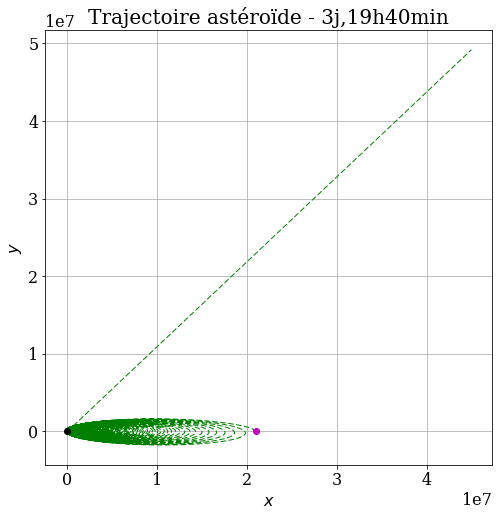

In [49]:
pyplot.figure(figsize=(8,8))
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.title('Trajectoire astéroïde - 3j,19h40min',fontsize=20)
pyplot.plot (x_traj_aa,y_traj_aa, 'g--',lw=1)
pyplot.plot (xa0,ya0,'mo')
pyplot.plot (0,0,'ko')

Et celui-ci atteindrait plus ou moins l'orbite de la lune 1 heure après (de nouveau, trouvé par tâtonnement). 

In [50]:
T_aaa = 3.86*86400              #3.86 jours
N_aaa=int(T_aaa / dt_a) +1
www=numpy.empty((N_aaa,4))                 
www[0]=numpy.array([xa0,ya0,vxa0,vya0])
for i in range(N_aaa-1):              
    www[i+1]=rk4_step_t(www[i],g,i+t0,dt_a)

In [51]:
x_traj_aaa=www[:,0]
y_traj_aaa=www[:,1]

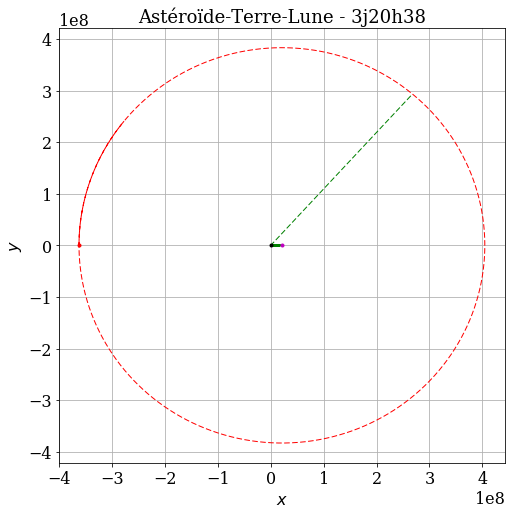

In [53]:
pyplot.figure(figsize=(8,8))
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.title('Astéroïde-Terre-Lune - 3j20h38',fontsize=18)
pyplot.plot (x_traj_aaa,y_traj_aaa, 'g--',lw=1)
pyplot.plot (x_traj,y_traj, 'r--',lw=1)
pyplot.plot (xa0,ya0,'m.')
pyplot.plot (0,0,'k.')
pyplot.plot (x0,0,'r.')

Bien entendu, les 3j20h38 sont ceux de l'astéroïde, on a quand même répresenté l'orbite entière de la lune pour savoir où elle se trouvait.


La position du satellite après 14 jours serait donc excessivement éloignée du sytème terre-lune. Tellement éloignée de celui-ci qu'on ne verrait plus grand chose d'intéressant vu l'échelle des axes requise. C'est pourquoi nous avons choisi de ne pas représenter sa trajectoire sur 14 jours, ni dans une représentation graphique, ni dans une animation (on se limitera au temps mis pour l'astéroïde pour atteindre l'orbite lunaire). Bien entendu, dans les animations, on considèrera que l'astéroïde ne s'écrase pas sur la terre, sinon le mouvement n'est pas intéressant à étudier.

## Question 6

Pour faire l'animation, il va falloir recalculer la trajectoire de la Lune avec moins d'itérations sinon l'animation serait beaucoup trop lourde, sachant que chaque itération correspondra à une image (frame).

Cependant, pour l'astéroïde, nous allons simplement représenter 1 position toutes les 1000 positions (comme $dt=1000$). On aurait pu pratiquer de la sorte pour la Lune mais on préférait avoir un indice simple pour itérer.

In [54]:
from matplotlib import animation
from IPython.display import HTML

In [55]:
dt=1000             # secondes
T=periode
N=int(T/dt)+1       # nombre de time steps

u_modif=numpy.empty((N,4))
u_modif[0]=numpy.array([x0,y0,vx0,vy0])

In [56]:
for t in range(N-1):              
    u_modif[t+1]=rk4_step(u_modif[t],f,dt)

In [57]:
x_traj_modif=u_modif[:,0]
y_traj_modif=u_modif[:,1]

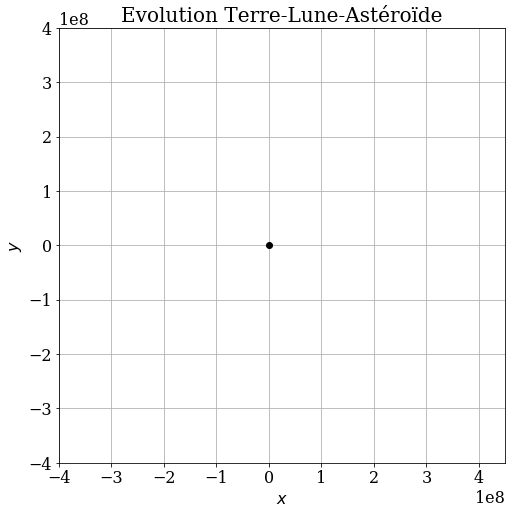

In [58]:
fig = pyplot.figure(figsize=(8,8))
ax = pyplot.axes(xlim=(-4*10**8,4.5*10**8), ylim=(-4*10**8,4*10**8))
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.title('Evolution Terre-Lune-Astéroïde',fontsize=20)
lineL= ax.plot([], [], 'ro')[0]
lineT= ax.plot(0,0, 'ko')[0]              # la line de la terre n'est pas vide de base car elle restera fixe
lineA=ax.plot([],[],'go')[0]

In [59]:
def init():         
    lineL.set_data([], [])
    lineA.set_data([], [])
    return lineL,lineA

La position de la lune est à représenter tout le long de la période mais celle de l'astéroïde ne doit apparaitre qu'à partir du moment où la lune est à l'apogée ($t_0$) et jusqu'à quelques jours (3.86) plus tard.

In [60]:
def animate(i):
    t=i
    lineL.set_data(x_traj_modif[t], y_traj_modif[t])             
    if(t>=int(t0/dt) and t<=((N_aaa+t0)/dt)):                  
        lineA.set_data(x_traj_aaa[t*dt-t0],y_traj_aaa[t*dt-t0])  #Le décalage de t0 et les valeurs à
    else:                                                        #sélectionner tous les 1000 indices sont
        lineA.set_data([], [])                                   #deux choses à ne pas oublier.
    return lineL,lineA

In [61]:
anim = animation.FuncAnimation(fig, animate, frames=N, interval=10, init_func=init,repeat=False)

In [62]:
HTML(anim.to_html5_video())

Bien entendu, sur cette animation, les positions sont les suivantes : terre en noir, lune en rouge et astéroïde en vert. Pour une animation moins saccadée au niveau de l'astéroïde (celui-ci se déplace à très grande vitesse autour du point $(0,0)$), on peut réduire le pas $dt$ mais cela va augmenter le nombre de frames à charger pour l'animation, sachant que celle qui est ici présentée recquiert 5 min de calcul.

#### Animation astéroïde uniquement
Représentons également la trajectoire de l'astéroïde près de la terre pour y voir plus clair. 

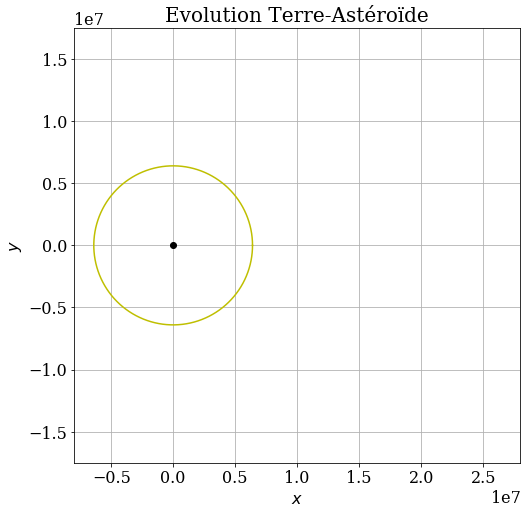

In [63]:
fig = pyplot.figure(figsize=(8,8))
ax = pyplot.axes(xlim=(-0.8*10**7,2.8*10**7), ylim=(-1.75*10**7,1.75*10**7))
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.title('Evolution Terre-Astéroïde',fontsize=20)
lineA= ax.plot([], [], 'go')[0]
lineT= ax.plot(0,0, 'ko')[0]
pyplot.plot (x_terre,y_terre, 'y-')

In [64]:
def init_bis():         
    lineA.set_data([], [])
    return lineA

Comme l'intervalle de temps étudié est plus court et vu que le mouvement est assez rapide, on choisit de sélectionner les positions tous les 120 indices (définition d'un $dt_{bis}$). L'animation met de nouveau environ 5 minutes à charger.

In [69]:
dt_bis=120

In [70]:
def animate_bis(i):
    t=i
    lineA.set_data(x_traj_aaa[t*dt_bis], y_traj_aaa[t*dt_bis])             
    return lineA

In [71]:
anim_bis = animation.FuncAnimation(fig, animate_bis, frames=int(N_aaa/dt_bis), interval=8, init_func=init_bis,repeat=False)

In [72]:
HTML(anim_bis.to_html5_video())